# EXAM WEEK 3
 #### Group 1: ANDREA GÓMEZ, MARINA IGUAL, CAROLINA JIAN. 

In [60]:
#Importing necessary libraries.
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plotter
from scipy.fftpack import fft

#Importing tow matrix from the file task1.mat

data = sio.loadmat('./task1.mat')

x = np.transpose(data['x_norm']) #Matrix with the cell trajectories
time = np.transpose(data['t'])  #Vector with the time measures

### PROBLEM 1

Text(0,0.5,'Cell Trajectories')

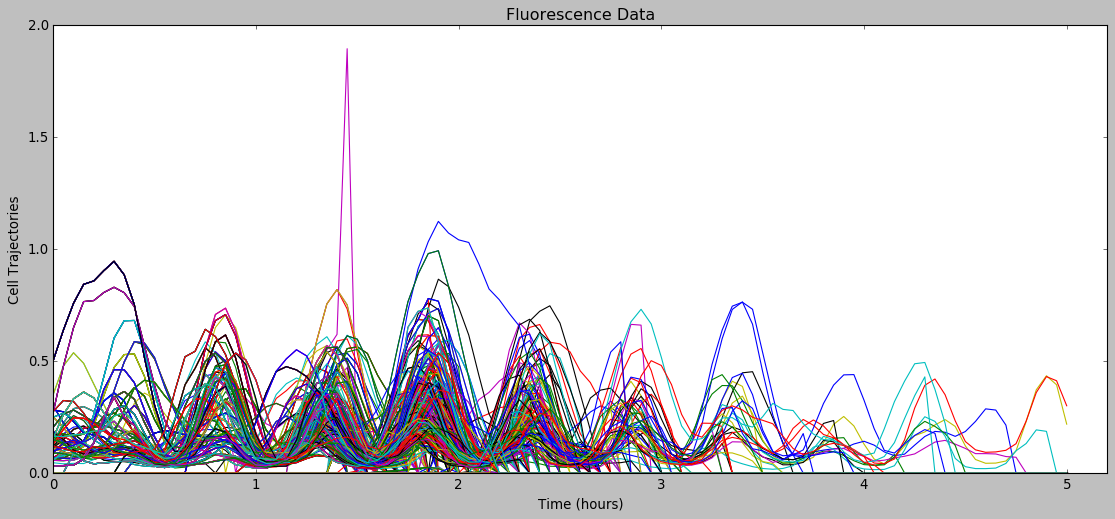

In [61]:
#Displaying the 101 measures for the 501 trajectories 
time_hours = time/60 #Changing the time vector to hours for a better representation

plotter.style.use('classic')
fig, ax = plotter.subplots(figsize=(17, 7))
ax.plot(time_hours, x)
plotter.axis([0,5.2,0,2])
plotter.title("Fluorescence Data")
plotter.xlabel("Time (hours)")
plotter.ylabel("Cell Trajectories")

Dates represents the movement of 501 cells catched in 101 segunds. 
Then, for every cell there are 101 dates of fluorescence

### PROBLEM 2

In [62]:
#Find peaks for each trajectory
from scipy.signal import find_peaks

means = []
vals = []
index = []

for i in range (0,501):
    cell = x[:,i]
    index, amp = find_peaks(cell)
    vals = cell[index]     #'vals' is a vector with the measures of fluorescence for the peaks in one cell. 
    mean = np.mean(vals)   #'mean' is the average amplitud for the peaks
    means.append(mean)

amplituds = np.array(means) #Storing the means in the array amplituds

amplituds0 = np.nan_to_num(amplituds) #Removing the 'nan' values from the array
amplituds0 = amplituds0.reshape (501,1) #Changing the array dimensions.



/home/osboxes/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/osboxes/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


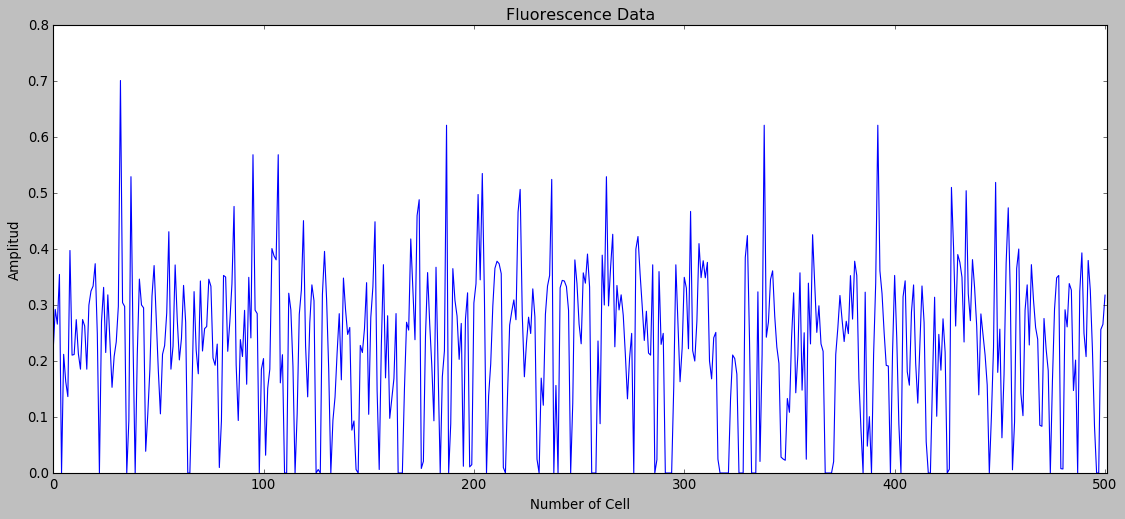

In [76]:
#Plot the peaks in the plot
fig, ax = plotter.subplots(figsize=(17, 7))

ax.plot(amplituds0)
plotter.axis([0,501,0,0.8])
plotter.title("Fluorescence Data")
plotter.xlabel("Number of Cell")
plotter.ylabel("Amplitud");

### PROBLEM 3

In [64]:
#Amplitude and period of oscillations 
#The period of oscillation is a distance between peaks in a single cell trajectory

distances = []
dists = []

for i in range (0,501):
    index, amp = find_peaks(x[:,i])
    for ind in range(len(index)-1):
        dist=index[ind+1]-index[ind]
        dists.append(dist)
    
    distances.append(np.mean(dists))
    dists=[]

periods = np.array(distances)  #Storing the mean periods for each cell in the array

periods0 = np.nan_to_num(periods) #Removing the 'nan' values

periods0 = periods0.reshape(501,1) #Changing the array dimensions

/home/osboxes/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/osboxes/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### PROBLEM 4 

Text(0.5,1,'Periods Distribution')

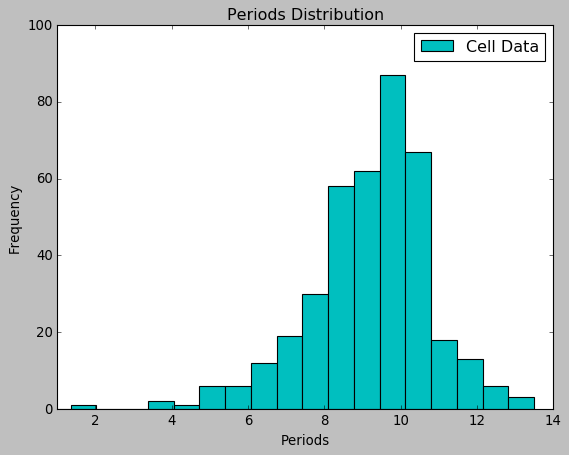

In [65]:
#Draw histogram of period distribution
plotter.hist(periods0,bins=20, histtype='bar', align='mid', color='c', label='Cell Data', edgecolor='black');
plotter.xlim(1,14)
plotter.ylim(0,100)
plotter.xlabel('Periods')
plotter.ylabel('Frequency')
plotter.legend()
plotter.title('Periods Distribution')

### PROBLEM 5

Text(0.5,1,'Amplituds vs Periods')

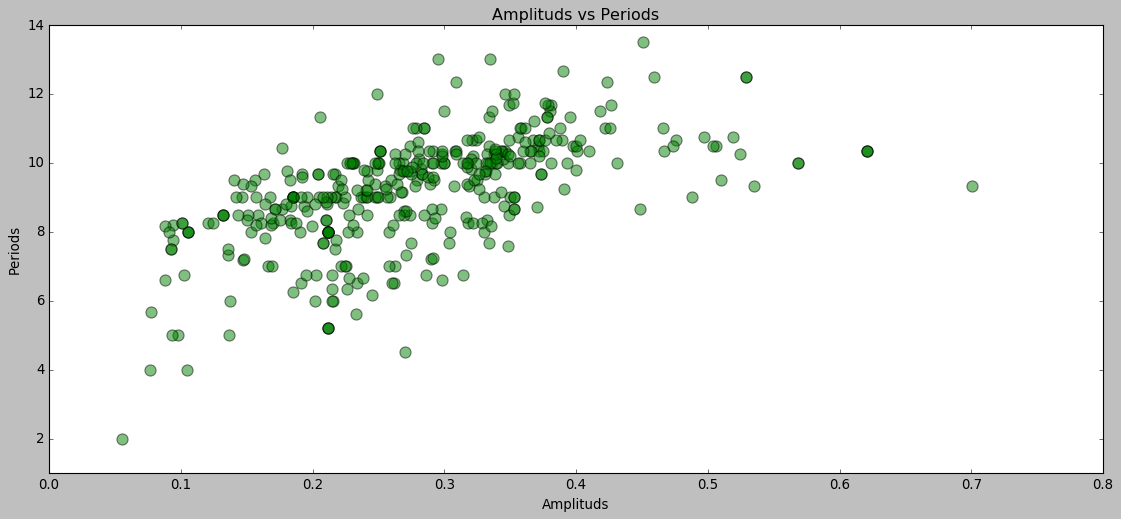

In [66]:
#Plot with Amplituds VS Periods. 
fig, ax = plotter.subplots(figsize=(17, 7))
plotter.scatter(amplituds0, periods0, alpha=0.5, s=100, c='green', cmap='viridis')
plotter.xlabel('Amplituds')
plotter.ylabel('Periods')
plotter.xlim(0,0.8)
plotter.ylim(1,14)
plotter.title('Amplituds vs Periods')

### PROBLEM 6

In [67]:
#Ten cell trajectiories with the smallest periods 
sort_index=np.argsort(periods0, axis=0) #The vector sort_index contains the index with ascending sorted.

trajectories = []
i = 0

for ind in sort_index:
    if periods0[ind] != 0: #Removing the 'nan' values (which period is 0)
        #print (x[:,ind])
        trajectories.append(x[:,ind])#Trajectories contains the trajectories for each cell with the smallest periods. 
        i+=1
    else:
        continue
    if i == 10: #We need just the 10 smallest periods
        break
    else:
        continue

trajectories_array = np.array(trajectories) #The 10 selected trajectories are stored in the array

trajectories_array=trajectories_array.reshape(10,101)


Text(0.5,1,'Ten cell trajectories')

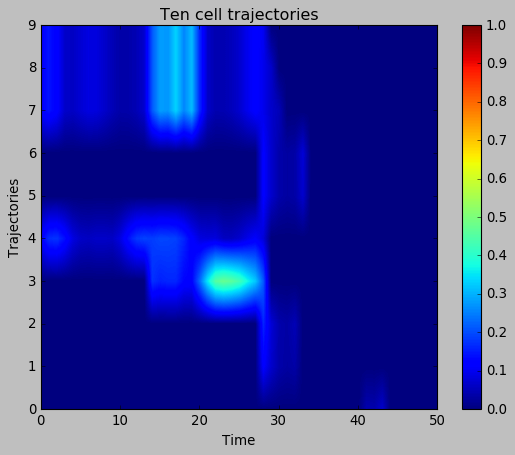

In [68]:
#PLot the heat map for the 10 selected trajectories

fig = plotter.figure()
plotter.style.use('classic')
plotter.imshow(trajectories_array, aspect='auto',origin='lower',cmap='jet') 
plotter.colorbar()
plotter.clim(0,1)
plotter.xlabel('Time')
plotter.ylabel('Trajectories')
plotter.xlim(0,50)
plotter.ylim(0,9)
plotter.title('Ten cell trajectories')

#Change the x aix to time. 

### PROBLEM 7

In [69]:
mean_amplitud = np.mean(amplituds0)
print(mean_amplitud)

0.22676539413155217


In [70]:
mean_period = np.mean(periods0)
print(mean_period)

7.183257438946061


Text(0.5,1,'FOURIER TRANSFORMATION')

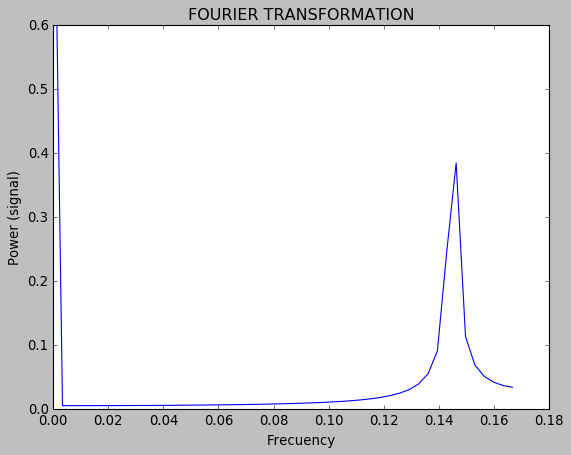

In [72]:
#Frequency analysis using FFT Fourier transformation and identify a dominant frequency in the signal
# Number of sample points
N = 101
# Sample spacing
T = 3

#frequency 
F = (1/mean_period)

a = np.linspace(0.0, N*T, N)
y = 0.5*(1+np.sin(F * 2.0*np.pi*a))

yf = fft(y) #To know the power of the signal
af = np.linspace(0.0, 1.0/(2.0*T), N//2)
plotter.plot(af, 2.0/N * np.abs(yf[0:N//2])) #xf is the vector
plotter.xlabel('Frecuency')
plotter.ylabel('Power (signal)')
plotter.xlim(0,0.18)
plotter.ylim(0,0.6)
plotter.title('FOURIER TRANSFORMATION')

The most power signal is with 0.15 of frequency. 